In [326]:
import pandas as pd
import math
import numpy as np
import plotly
import plotly.express as px
import plotly.graph_objs as go
import plotly.io as pi
from plotly.offline import download_plotlyjs, init_notebook_mode,plot,plot, iplot
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt


In [327]:
df = pd.read_excel("Datos radiación 2017-ene01-dic31 Hermosillo Sonora.xlsx",header=3,sheet_name="Mayo")
df_irradiancia = df.groupby(["TIMESTAMP"]).sum()
df_irradiancia = df_irradiancia*600/1000000
df_irradiancia_KWh = df_irradiancia/3.6
df_irradiancia_KWh["Avg"]

C:\Users\Usuario\AppData\Local\Temp\ipykernel_3892\1842375038.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



TIMESTAMP
2017-05-01    8.454369
2017-05-02    8.373029
2017-05-03    8.330130
2017-05-04    8.183683
2017-05-05    8.055411
2017-05-06    8.192363
2017-05-07    6.414114
2017-05-08    5.345173
2017-05-09    7.223092
2017-05-10    8.234741
2017-05-11    8.483551
2017-05-12    8.463636
2017-05-13    8.528290
2017-05-14    8.538265
2017-05-15    8.428678
2017-05-16    7.133523
2017-05-17    8.771705
2017-05-18    8.488336
2017-05-19    8.475666
2017-05-20    8.616289
2017-05-21    8.452099
2017-05-22    8.610088
2017-05-23    8.654447
2017-05-24    8.623658
2017-05-25    8.054306
2017-05-26    8.274464
2017-05-27    8.629866
2017-05-28    8.950388
2017-05-29    8.388732
2017-05-30    8.253768
2017-05-31    8.484927
Name: Avg, dtype: float64

In [328]:
round(df_irradiancia_KWh["Avg"].mean(),3)

8.197

In [329]:
df_irradiancia_KWh.to_excel("Irradiancia_promedio.xlsx")

In [330]:
df["time"] = df["TIMESTAMP"].astype(str) + " " + df["HORA"].astype(str)
df1 = df.drop(2226)
df1["time"] = pd.to_datetime(df1["time"],format='%Y-%m-%d %H')
lineplot = px.line(
                data_frame=df1,
                x="time",
                y="Avg",
                labels={'Avg':'Irradiancia','time':'Fecha - Mayo'},
                title='Irradiancia Hermosillo Mayo',
                template='plotly_dark'
                )
lineplot.update_layout(title=dict(font=dict(family='JetBrains Mono',size=30)))
lineplot.show()

In [331]:
df1.to_excel("Irradiancia_mayo.xlsx")

In [332]:
lineplot.write_html("Irradiancia_Mayo_Hermosillo.html")

In [333]:
df1["horas"]=df1["time"].dt.time
linechart_time = px.line(
                    data_frame=df1,
                    x="horas",
                    y="Avg",
                    color=df1["TIMESTAMP"].dt.date,
                    labels = {"Avg":"Irradiancia","horas":"Horario 24H"},
                    title = "Irradiancia Diaria Mayo Hermosillo",
                    template = "plotly_dark",
                    width= 1200,
                    height= 700
                    )
linechart_time.update_layout(title=dict(font=dict(family='JetBrains Mono',size=20)),
                            xaxis=dict(nticks=23))
linechart_time.show()

In [334]:
linechart_time.write_html("Irradiancia.html")

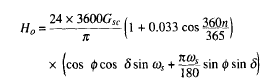


In [335]:
LATITUD_HERMOSILLO = 29.1 #GRADOS
SOLAR_CONSTANT = 1367 #W/m2
MAYO_DIA_1 = 120
C = 360/365
V = 24*3600*1367/np.pi
#WS = COS-1(-TAN(LATITUD)*TAN(DECLINACION))
df1["dia"] = df1["TIMESTAMP"].dt.day
df1["declinacion"] = round(23.45*np.sin(np.radians(C*(284+MAYO_DIA_1+df1["dia"]))),3)
df1["ws"] = round(np.degrees(np.arccos(-np.tan(np.radians(LATITUD_HERMOSILLO))*np.tan(np.radians(df1["declinacion"])))),3)
df1["exentricidad"] = round(1+0.033*np.cos(np.radians(C*(df1["dia"]+MAYO_DIA_1))),3)
df1["Ho"] = round((V*df1["exentricidad"]*((np.cos(np.radians(LATITUD_HERMOSILLO))*np.cos(np.radians(df1["declinacion"]))*np.sin(np.radians(df1["ws"])))+((np.pi*df1["ws"]/180)*np.sin(np.radians(LATITUD_HERMOSILLO))*np.sin(np.radians(df1["declinacion"])))))/1000000,3)
resutados = df1[["TIMESTAMP","horas","Avg","dia","declinacion","ws","exentricidad","Ho"]].copy()
resutados["indice_claridad"] = round(df1["Avg"]/df1["Ho"],3)
resutados.rename(columns={"Avg":"Irradiancia_Estación"},inplace=True)
resutados

,TIMESTAMP,horas,Irradiancia_Estación,dia,declinacion,ws,exentricidad,Ho,indice_claridad
0,2017-05-01,00:00:00,0.0,1,14.901,98.517,0.984,38.848,0.0
1,2017-05-01,00:10:00,0.0,1,14.901,98.517,0.984,38.848,0.0
2,2017-05-01,00:20:00,0.0,1,14.901,98.517,0.984,38.848,0.0
3,2017-05-01,00:30:00,0.0,1,14.901,98.517,0.984,38.848,0.0
4,2017-05-01,00:40:00,0.0,1,14.901,98.517,0.984,38.848,0.0
...,...,...,...,...,...,...,...,...,...
4453,2017-05-31,23:10:00,0.0,31,21.898,102.928,0.972,40.782,0.0
4454,2017-05-31,23:20:00,0.0,31,21.898,102.928,0.972,40.782,0.0
4455,2017-05-31,23:30:00,0.0,31,21.898,102.928,0.972,40.782,0.0
4456,2017-05-31,23:40:00,0.0,31,21.898,102.928,0.972,40.782,0.0


In [336]:
resutados.to_excel("resultados.xlsx")

In [337]:
indice = px.line(data_frame=resutados,
                 x="horas",
                 y="indice_claridad",
                 color="TIMESTAMP",
                 title="Indice de claridad mensual",
                 template = "plotly_dark",
                 width= 1200,
                 height= 700
                    )
indice.update_layout(title=dict(font=dict(family='JetBrains Mono',size=30)),
                            xaxis=dict(nticks=23))
indice.show()

In [338]:
indice.write_html("indice.html")

In [339]:
nasa = pd.read_csv("NASA.csv",header=9)
nasa.rename(columns={'ALLSKY_SFC_SW_DWN':"Irradiación"},inplace=True)
df_irradiancia_KWh = df_irradiancia_KWh.reset_index()
df_comparativa = df_irradiancia_KWh[["Avg"]].copy()
df_comparativa["Irradiación"] = nasa["Irradiación"]
df_comparativa["Fecha"] = df_irradiancia_KWh["TIMESTAMP"]
df_comparativa.rename(columns={"Avg":"Irradiación estación"},inplace=True)
df_comparativa["Irradiación estación"] = round(df_comparativa["Irradiación estación"],2)
df_comparativa

,Irradiación estación,Irradiación,Fecha
0,8.45,8.63,2017-05-01
1,8.37,8.53,2017-05-02
2,8.33,8.57,2017-05-03
3,8.18,8.37,2017-05-04
4,8.06,8.28,2017-05-05
5,8.19,8.22,2017-05-06
6,6.41,6.15,2017-05-07
7,5.35,4.87,2017-05-08
8,7.22,5.54,2017-05-09
9,8.23,8.19,2017-05-10


In [340]:
trace1 = go.Bar(
    x=df_comparativa["Fecha"],
    y=df_comparativa["Irradiación estación"],
    name="Irradiación estación Hermosillo"
)
trace2 = go.Bar(
    x=df_comparativa["Fecha"],
    y=df_comparativa["Irradiación"],
    name="Irradiación Nasa"
)

fig = make_subplots(rows=1,cols=1)
fig.add_trace(trace1,row=1,col=1)
fig.add_trace(trace2,row=1,col=1)
fig['layout'].update(height = 600,
                     width = 1000,
                     title = dict(text="Comparativa Irradiancias",font=dict(family='JetBrains Mono',size=25)),
                     template="plotly_dark",)
iplot(fig)


In [341]:
fig.write_html("Comparativa_Irradiancias.html")

In [342]:
df_comparativa["similitud"] = round(df_comparativa["Irradiación estación"]*100/df_comparativa["Irradiación"],2)
similitud = px.bar(data_frame=df_comparativa,
               x="Fecha",
               y="similitud",
               title="Precisión de estación Hermosillo vs Nasa",
               range_color=[98,130],
               template="plotly_dark")
similitud.update_layout(title=dict(font=dict(family='JetBrains Mono',size=30)))
similitud.show()

In [343]:
similitud.write_html("similitud.html")

In [344]:
df_comparativa["HSP"] = df_comparativa["Irradiación estación"].astype(str) + " Horas pico"
df_comparativa

,Irradiación estación,Irradiación,Fecha,similitud,HSP
0,8.45,8.63,2017-05-01,97.91,8.45 Horas pico
1,8.37,8.53,2017-05-02,98.12,8.37 Horas pico
2,8.33,8.57,2017-05-03,97.20,8.33 Horas pico
3,8.18,8.37,2017-05-04,97.73,8.18 Horas pico
4,8.06,8.28,2017-05-05,97.34,8.06 Horas pico
5,8.19,8.22,2017-05-06,99.64,8.19 Horas pico
6,6.41,6.15,2017-05-07,104.23,6.41 Horas pico
7,5.35,4.87,2017-05-08,109.86,5.35 Horas pico
8,7.22,5.54,2017-05-09,130.32,7.22 Horas pico
9,8.23,8.19,2017-05-10,100.49,8.23 Horas pico


In [345]:
df_comparativa.to_excel("comparativa.xlsx")